In [1]:
from utils.DatsetDownloader import Download_wo_tex_ptb, Download_Ex_dataset_2
import warnings

warnings.filterwarnings(action='ignore')

Download_wo_tex_ptb([10])

In [2]:
import tensorflow as tf
import h5py as h5
import numpy as np

data = h5.File("datasets/wo_tex_ptb/01_x_Test.h5", 'r')['data'][:100] 
data[:, :10001] = data[:, :10001]/100

y = tf.keras.utils.to_categorical(data[:, -3]-1, num_classes=7)

smallfcn = tf.keras.models.load_model("models/smallFCN_CS.h5")
smallp2p_gene = tf.keras.models.load_model("models/smallPix2Pix_gene.h5")

In [3]:
smallfcn.summary()

Model: "FCN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8192, 1)]         0         
                                                                 
 conv1d_28 (Conv1D)          (None, 8192, 16)          96        
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 4096, 16)         0         
 g1D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 4096, 16)          0         
                                                                 
 conv1d_29 (Conv1D)          (None, 4096, 16)          1296      
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 2048, 16)         0         
 g1D)                                                          

In [4]:
smallp2p_gene.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8192, 1)]    0           []                               
                                                                                                  
 sequential (Sequential)        (None, 8192, 64)     320         ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 8192, 64)     20736       ['sequential[0][0]']             
                                                                                                  
 sequential_2 (Sequential)      (None, 4096, 64)     20736       ['sequential_1[0][0]']           
                                                                                              

                                                                                                  
 conv1d_12 (Conv1D)             (None, 8192, 1)      641         ['concatenate_10[0][0]']         
                                                                                                  
Total params: 13,891,265
Trainable params: 13,880,001
Non-trainable params: 11,264
__________________________________________________________________________________________________


In [5]:
output = smallp2p_gene.predict(data[:, :8192].reshape(-1, 8192, 1))

4/4 [==============================] - 8s 2s/step


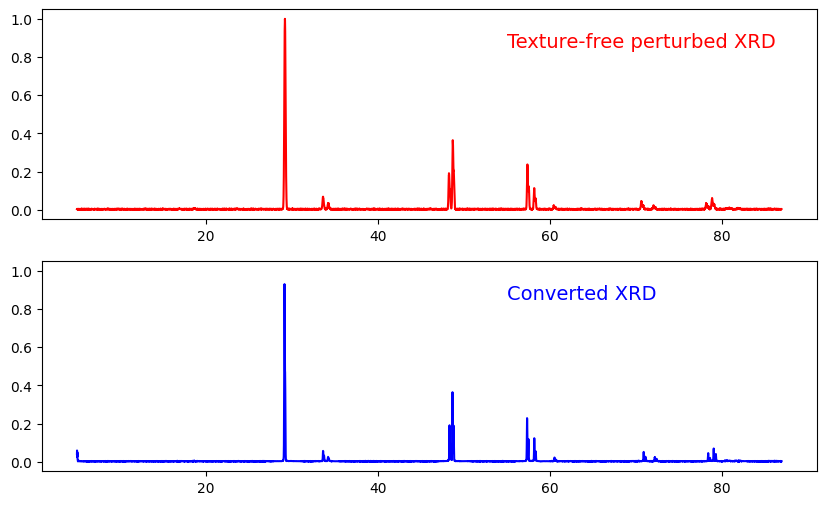

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

axes[0].plot(np.arange(0, 8192)/100 + 5, data[0, :8192], c = 'red')
axes[1].plot(np.arange(0, 8192)/100 + 5, output[0, :, 0], c = 'blue')

axes[0].text(55, 0.85, "Texture-free perturbed XRD", fontsize=14, c = 'red')
axes[1].text(55, 0.85, "Converted XRD", fontsize=14, c = 'blue')

axes[0].set_ylim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)

plt.show()

In [7]:
evaluation_sfcn = smallfcn.evaluate(data[:, :8192].reshape(-1, 8192, 1), y)
evaluation_conv = smallfcn.evaluate(output, y)

4/4 [==============================] - 0s 22ms/step - loss: 0.3405 - accuracy: 0.9300


In [8]:
Ex_dataset_1 = np.loadtxt("./datasets/Ex_dataset_1/Ex_dataset_1.csv", delimiter = ',')
Ex_1_train = Ex_dataset_1[:,:8192]
Ex_1_test = tf.keras.utils.to_categorical(Ex_dataset_1[:,-3]-1, num_classes=7)

In [9]:
evaluation_sfcn = smallfcn.evaluate(Ex_1_train.reshape(-1, 8192, 1), Ex_1_test)

2/2 [==============================] - 0s 26ms/step - loss: 0.4758 - accuracy: 0.9038


In [10]:
Download_Ex_dataset_2()

In [11]:
Ex_dataset_2 = np.loadtxt("./datasets/Ex_dataset_2/Ex_dataset_2.csv", delimiter = ',')
Ex_2_train = Ex_dataset_2[:,:8192]
Ex_2_test = tf.keras.utils.to_categorical(Ex_dataset_2[:,-3]-1, num_classes=7)

In [12]:
evaluation_sfcn = smallfcn.evaluate(Ex_2_train.reshape(-1, 8192, 1), Ex_2_test)

51/51 [==============================] - 1s 28ms/step - loss: 2.0550 - accuracy: 0.7053
